# Part 1: Implementing Local Random Search Algorithms

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [671]:
! pip install networkx
! python --version

import time

import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

Python 3.9.12


## Flipflop Problem Implementations

In [1280]:
# Initialize fitness function object using pre-defined class FlipFlop
fitness = mlrose_hiive.FlipFlop()

In [1281]:
# Define optimization problem object
SIZE = 1024
problem = mlrose_hiive.DiscreteOpt(length = SIZE, fitness_fn = fitness, maximize=True, max_val=2)

### Random Hill Climbing

In [1245]:
# Solve using randomized hill climbing - attempt 1 (1 random attempt)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=10, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.509005069732666


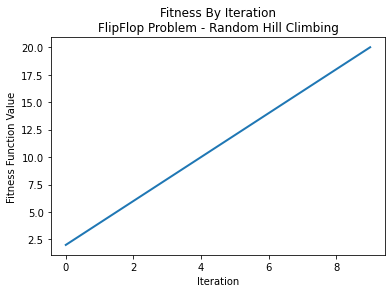

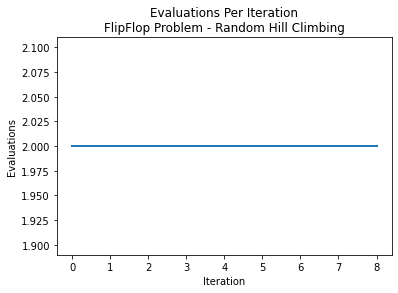

In [1246]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1247]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. ... 0. 0. 0.]


In [1248]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  20.0


In [1249]:
# Solve using randomized hill climbing - attempt 2 (10 random attempts)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=20, max_iters=10000, restarts=10, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 24.512814044952393


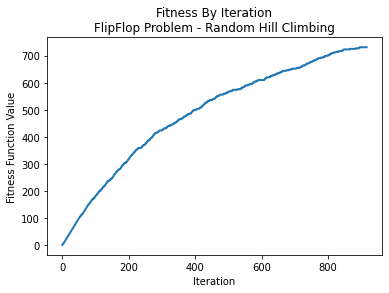

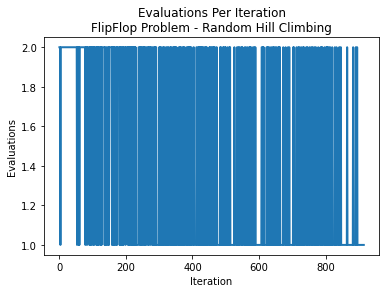

In [1250]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1251]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  731.0


In [1252]:
# print('The best state found is: ', best_state)

### Simulated Annealing implementation

In [1253]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [1258]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 100, init_state = init_state,
                                                      random_state = 1, curve=True)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.4113810062408447


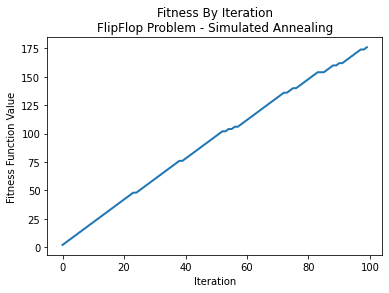

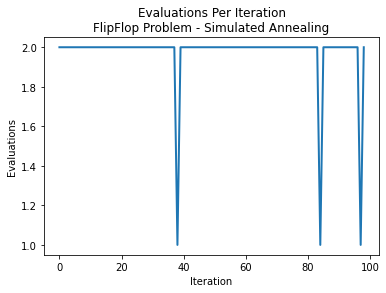

In [1259]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1260]:
# print('The best state found is: ', best_state)

In [1261]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  176.0


In [1262]:
# Solve using simulated annealing - attempt 2 (maximum 100 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 30, 
                                                      max_iters = 20000, init_state = init_state,  curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 21.470088958740234


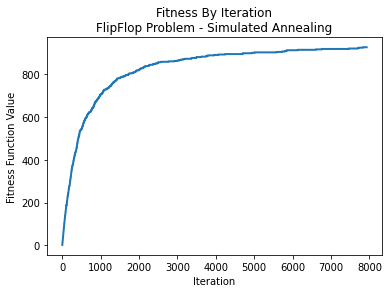

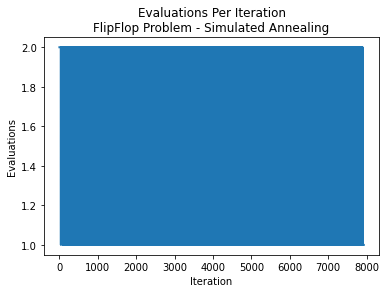

In [1263]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1264]:
# print('The best state found is: ', best_state)

In [1265]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  926.0


### Genetic Algorithm

In [1268]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
# print(len(fitness_values))
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.3056671619415283


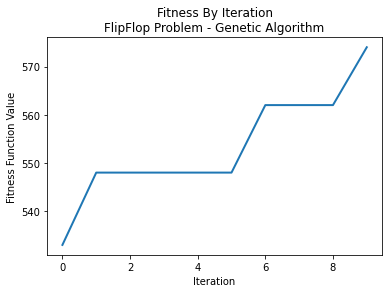

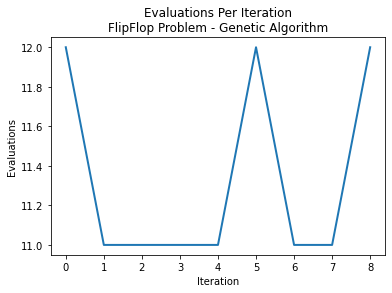

In [1269]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1270]:
# print('The best state found is: ', best_state)

In [1271]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  574.0


In [1272]:
# Solve using simulated annealing - attempt 2 (maximum 20 iterations)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=100, mutation_prob=0.1, max_attempts=20, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 21.488568782806396


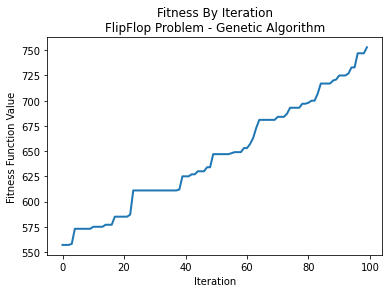

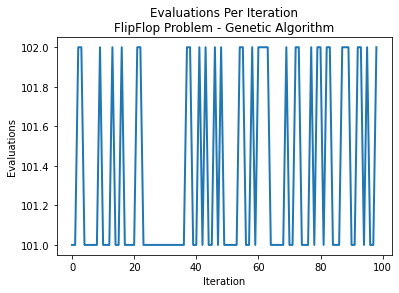

In [1273]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1274]:
# print('The best state found is: ', best_state)

In [1275]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  753.0


### MIMIC

In [1307]:
# Solve using simulated annealing - attempt 1 (population size 20, maximum 10 attempts, maximum 10 iterations)
SIZE = 128
problem = mlrose_hiive.DiscreteOpt(length = SIZE, fitness_fn = fitness, maximize=True, max_val=2)
init_state = np.zeros(SIZE)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=20, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 103.77524900436401


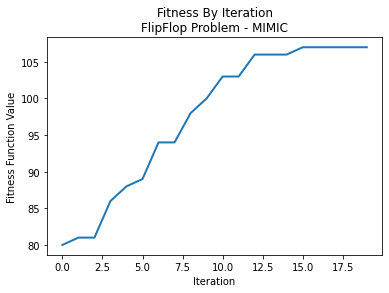

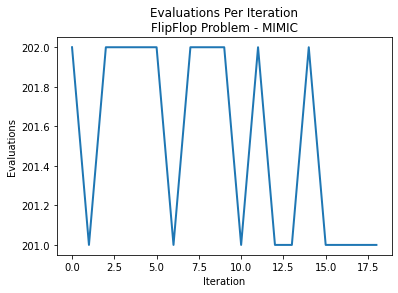

In [1308]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nFlipFlop Problem - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nFlipFlop Problem - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1309]:
# print('The best state found is: ', best_state)

In [1310]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  107.0


## Traveling Salesman Problem (TSP) Using Coordinate-Defined Fitness Function

In [1311]:
rng = np.random.default_rng(1)

# Create list of city coordinates
CITIES = 16
coordinates = rng.integers(low=0, high=CITIES, size=(CITIES,2))
coords_list = [(c[0], c[1]) for c in coordinates]
print(coords_list)

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)

[(7, 8), (12, 15), (0, 2), (13, 15), (3, 4), (13, 6), (4, 13), (4, 6), (10, 8), (1, 0), (13, 12), (13, 8), (13, 5), (7, 12), (1, 4), (1, 7)]


In [1312]:
# Define optimization problem object
problem = mlrose_hiive.TSPOpt(length = CITIES, fitness_fn = fitness_coords, maximize = True)

### Randomized Hill Climbing

In [1313]:
# Solve using randomized hill climbing - attempt 1 (1 random attempt)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=1, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.0017948150634765625


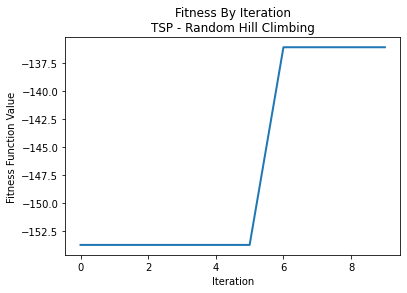

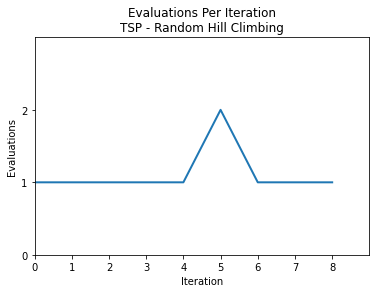

In [1314]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1315]:
print('The best state found is: ', best_state)

The best state found is:  [ 0  1  6 13  4  5  2  7  8  9 10 11 12  3 14 15]


In [1316]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -136.109745647863


In [1317]:
# Solve using randomized hill climbing - attempt 2 (10 random attempts)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=1000, max_iters=1000, restarts=100, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 5.443988084793091


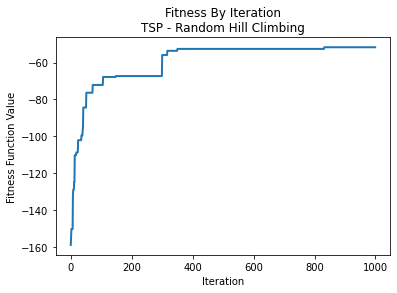

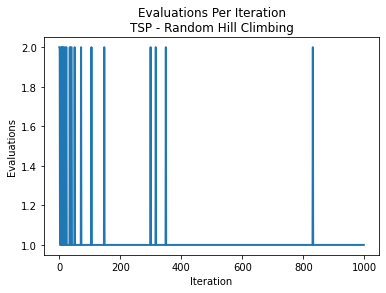

In [1318]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1319]:
print('The best state found is: ', best_state)

The best state found is:  [ 7  4  9  2 14 15  6 13  1  3 10 11  5 12  8  0]


In [1320]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -51.729965337595274


### Simulated Annealing implementation

In [1321]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [1322]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 10, init_state = init_state, curve=True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.0018870830535888672


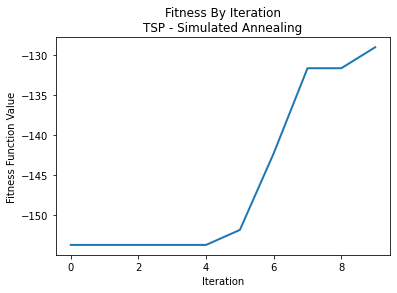

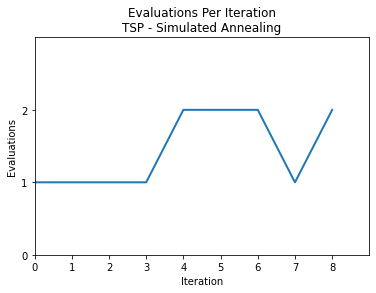

In [1323]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1324]:
print('The best state found is: ', best_state)

The best state found is:  [ 0  1  2  4 15 13  6  5  8  9 10 11 12  3 14  7]


In [1325]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -128.98714716775225


In [1326]:
# Solve using simulated annealing - attempt 2 (maximum 100 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10000, 
                                                      max_iters = 400, init_state = init_state,  curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.031749725341796875


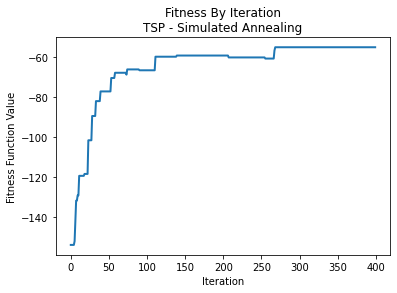

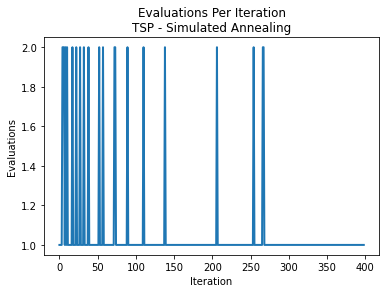

In [1327]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\nTSP - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1328]:
print('The best state found is: ', best_state)

The best state found is:  [ 7  6 13  1  3 10 11  5 12  8  0  4  9  2 14 15]


In [1329]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -54.99927406179288


### Genetic Algorithm

In [1344]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=10, mutation_prob=0.1, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.015794038772583008


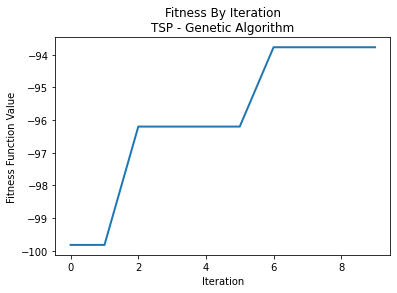

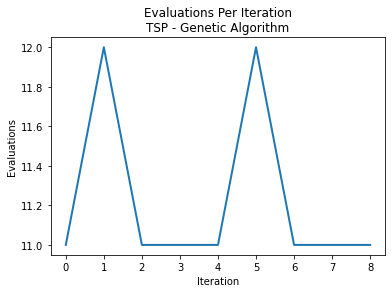

In [1345]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1346]:
print('The best state found is: ', best_state)

The best state found is:  [ 6  2  9  4 14 15  5 11  1 13  7  8 12  0 10  3]


In [1347]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -93.77076900939771


In [1348]:
# Solve using simulated annealing - attempt 2 (maximum 20 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=100, max_iters=200, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 4.377609014511108


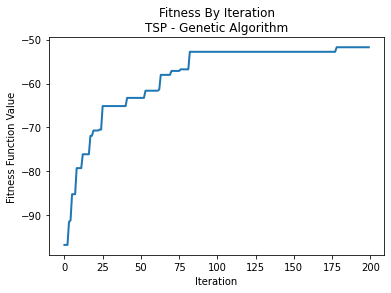

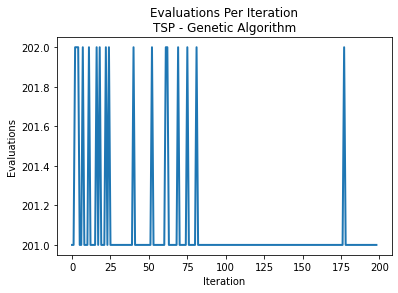

In [1349]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1350]:
print('The best state found is: ', best_state)

The best state found is:  [ 8 12  5 11 10  3  1 13  6 15 14  2  9  4  7  0]


In [1351]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -51.729965337595274


### MIMIC

In [1411]:
# Solve using simulated annealing - attempt 1 (population size 20, maximum 10 attempts, maximum 10 iterations)
init_state = [i for i in range(0,CITIES)]
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=600, keep_pct=0.3, max_attempts=20, max_iters=12, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 6.004840135574341


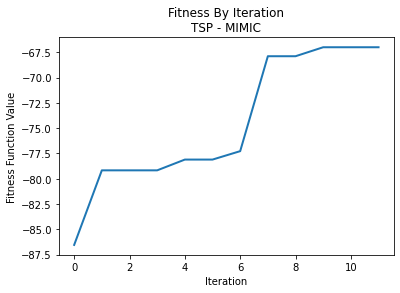

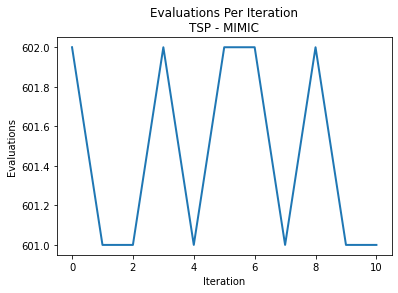

In [1412]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\nTSP - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\nTSP - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1413]:
print('The best state found is: ', best_state)

The best state found is:  [ 3  1  6 13 12  5 11  8 14  2  9  4 15  7  0 10]


In [1414]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  -67.0056458425162


## 6-Peaks Problem (32 dimensions)

In [1415]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.SixPeaks()

In [1535]:
# Define optimization problem object
DIMENSIONS = 32
problem = mlrose_hiive.DiscreteOpt(length = DIMENSIONS, fitness_fn = fitness, maximize=True, max_val=2)

### Randomized Hill Climbing

In [1527]:
# Solve using randomized hill climbing - attempt 1 (1 random attempt)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=100, max_iters=100, restarts=1500, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.006533145904541


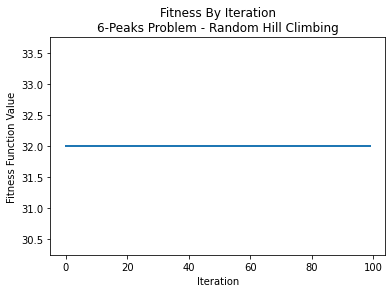

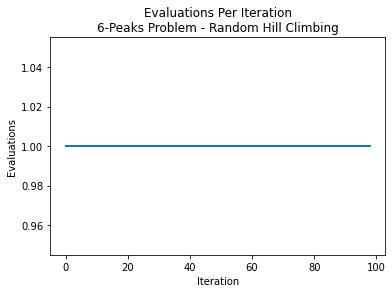

In [1528]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1529]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [1530]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  32.0


In [1536]:
# Solve using randomized hill climbing - attempt 2 (10 random attempts)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curves = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=10, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curves)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.003258943557739258


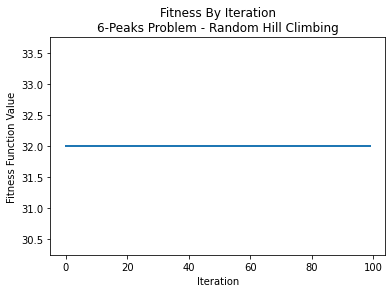

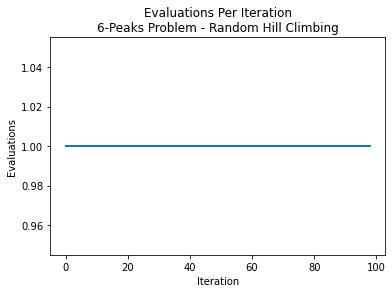

In [1537]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1538]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [1539]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  32.0


### Simulated Annealing

In [1478]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [1544]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = init_state, curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.01342320442199707


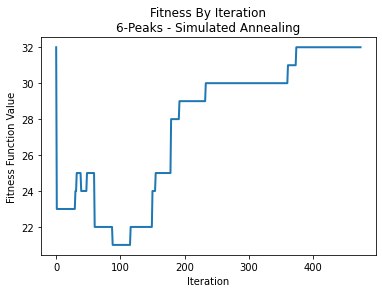

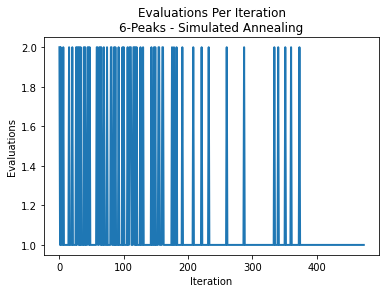

In [1545]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1546]:
print('The best state found is: ', best_state)

The best state found is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [1547]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  32.0


### Genetic Algorithm

In [1573]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=600, mutation_prob=0.1, max_attempts=100, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.6434919834136963


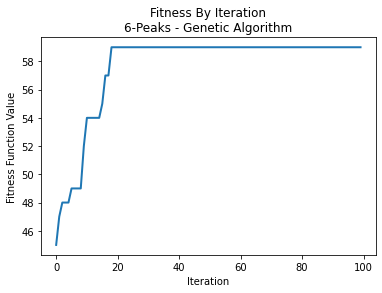

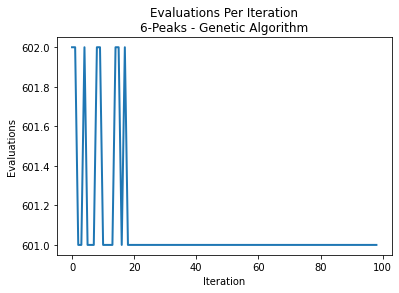

In [1574]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1575]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1576]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  59.0


### MIMIC

In [1581]:
# Solve using simulated annealing - attempt 1 (population size 20, maximum 10 attempts, maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.198920249938965


In [1582]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0]


In [1583]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  4.0


In [1584]:
# Solve using simulated annealing - attempt 2 (population size 20, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=100, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 30.108115911483765


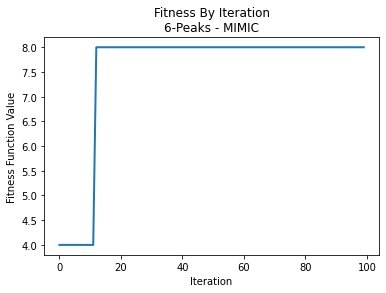

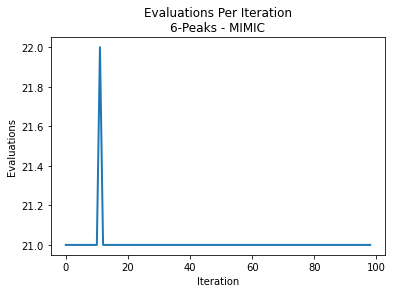

In [1585]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1586]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [1587]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  8.0


In [1588]:
# Solve using simulated annealing - attempt 3 (population size 40, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=40, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.226526975631714


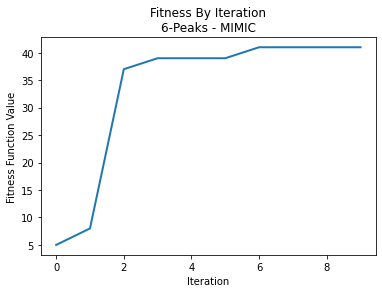

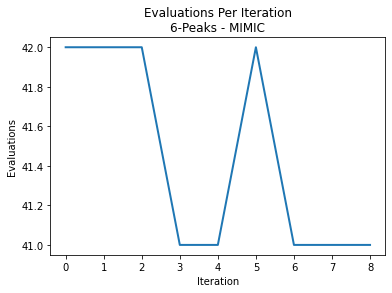

In [1589]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1590]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0]


In [1591]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  41.0


In [1592]:
# Solve using simulated annealing - attempt 4 (population size 100, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.166268825531006


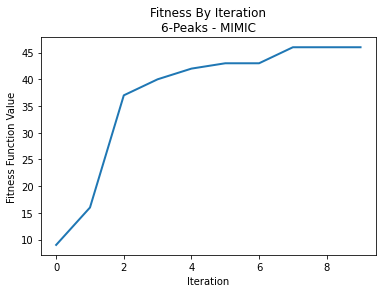

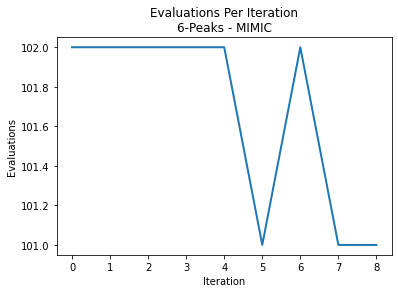

In [1593]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1594]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0]


In [1595]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  46.0


In [1652]:
# Solve using simulated annealing - attempt 5 (population size 200, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=400, keep_pct=0.2, max_attempts=50, max_iters=15, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 4.872004747390747


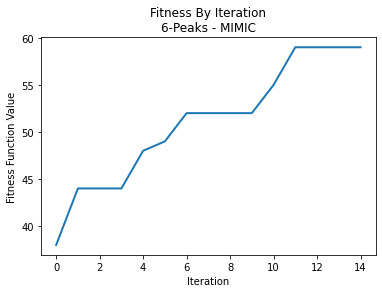

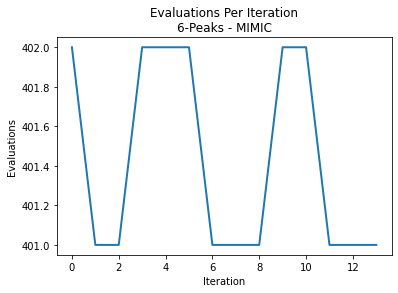

In [1653]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1654]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1655]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  59.0


## 6-Peaks Problem (64 dimensions)

In [1656]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.SixPeaks()

In [1657]:
# Define optimization problem object
DIMENSIONS = 64
problem = mlrose_hiive.DiscreteOpt(length = DIMENSIONS, fitness_fn = fitness, maximize=True, max_val=2)

### Randomized Hill Climbing

In [1658]:
# Solve using randomized hill climbing - attempt 1 (1 random attempt)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=100, max_iters=100, restarts=1500, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 4.196706056594849


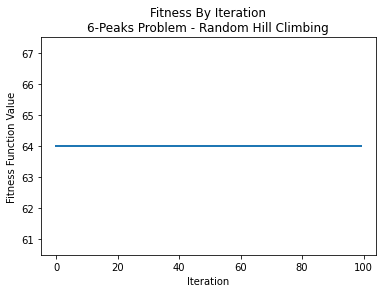

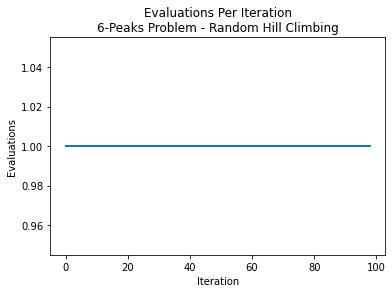

In [1659]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1661]:
# print('The best state found is: ', best_state)

In [1662]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  64.0


In [1663]:
# Solve using randomized hill climbing - attempt 2 (10 random attempts)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curves = mlrose_hiive.random_hill_climb(problem, max_attempts=10, max_iters=10, restarts=10, init_state=init_state, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curves)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.00396728515625


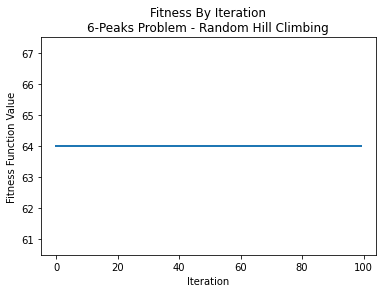

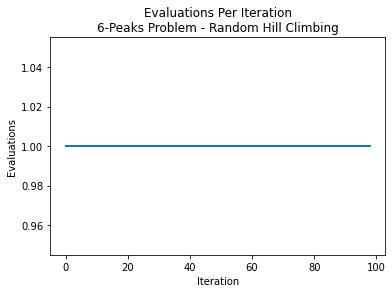

In [1664]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks Problem - Random Hill Climbing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks Problem - Random Hill Climbing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1666]:
# print('The best state found is: ', best_state)

In [1667]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  64.0


### Simulated Annealing

In [1668]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [1669]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = init_state, curve = True,
                                                      random_state = 1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 0.019823789596557617


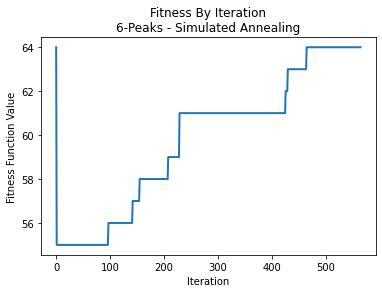

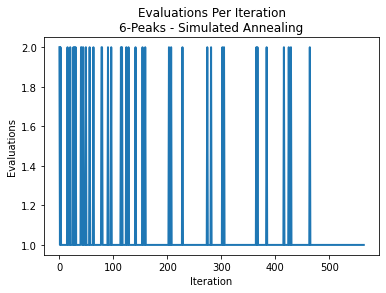

In [1670]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values)), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1))
ax1.set_title("Fitness By Iteration\n6-Peaks - Simulated Annealing")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations)), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Simulated Annealing")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1672]:
# print('The best state found is: ', best_state)

In [1673]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  64.0


### Genetic Algorithm

In [1674]:
# Solve using simulated annealing - attempt 1 (maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.genetic_alg(problem, pop_size=600, mutation_prob=0.1, max_attempts=100, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 3.898700714111328


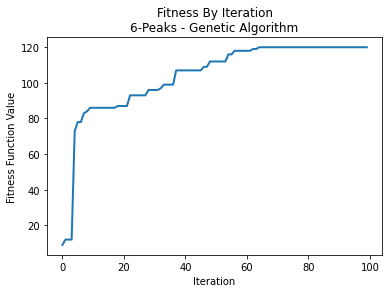

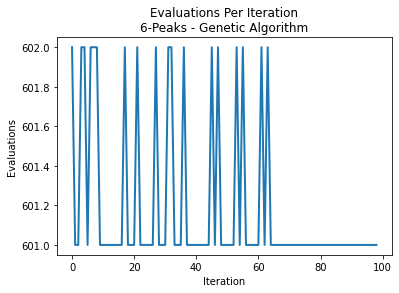

In [1675]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - Genetic Algorithm")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - Genetic Algorithm")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1676]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1677]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  120.0


### MIMIC

In [1678]:
# Solve using simulated annealing - attempt 1 (population size 20, maximum 10 attempts, maximum 10 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 11.950776100158691


In [1679]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0]


In [1680]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  5.0


In [1681]:
# Solve using simulated annealing - attempt 2 (population size 20, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=20, keep_pct=0.2, max_attempts=100, max_iters=100, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 119.27063417434692


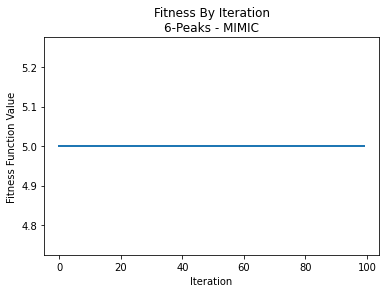

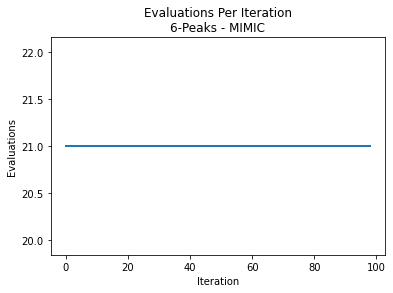

In [1682]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1683]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0]


In [1684]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  5.0


In [1685]:
# Solve using simulated annealing - attempt 3 (population size 40, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=40, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 12.489351272583008


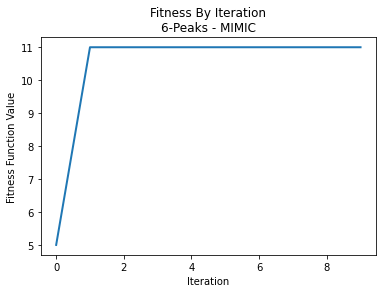

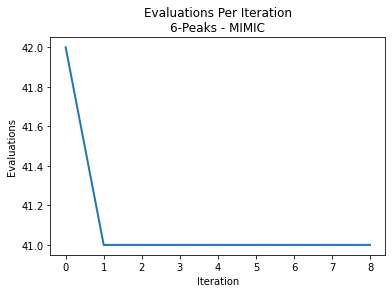

In [1686]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1687]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [1688]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  11.0


In [1689]:
# Solve using simulated annealing - attempt 4 (population size 100, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=10, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

Wall clock time: 12.744709253311157


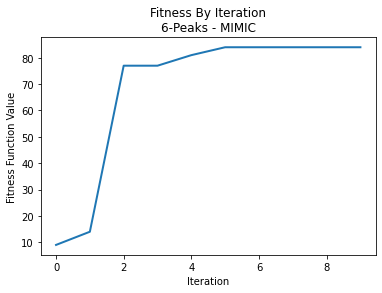

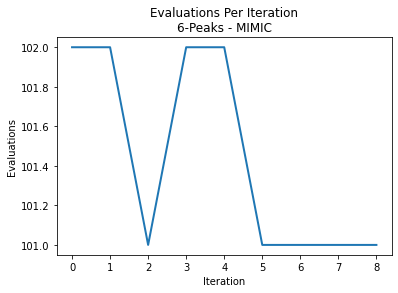

In [1690]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1691]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1692]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  84.0


In [ ]:
# Solve using simulated annealing - attempt 5 (population size 200, maximum 100 attempts, maximum 100 iterations)
init_state = np.zeros(DIMENSIONS)
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, pop_size=400, keep_pct=0.1, max_attempts=50, max_iters=20, curve=True, random_state=1)
end = time.time()
print("Wall clock time: {}".format(end-start))
# print(fitness_curve)
fitness_values = fitness_curve[:,0]
# print(fitness_values)
evaluations = fitness_curve[:,1]
evaluations = [j-i for i, j in zip(evaluations[:-1], evaluations[1:])]
# print(evaluations)

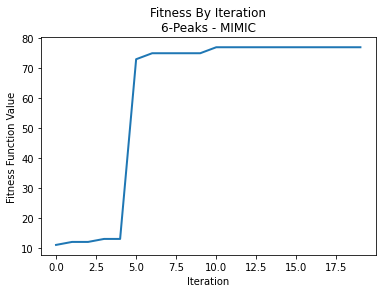

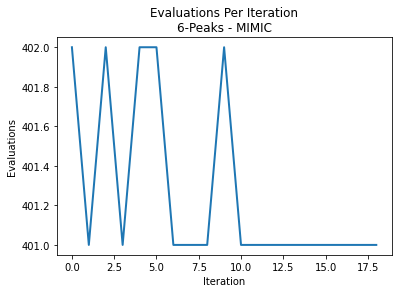

In [1706]:
fig1, ax1 = plt.subplots()
ax1.plot(range(len(fitness_values)),fitness_values,linewidth=2.0)
# ax1.set(xlim=(0,len(fitness_values)), xticks=np.arange(0,len(fitness_values), 10), ylim=(0, max(fitness_values)+1), yticks=np.arange(0,max(fitness_values)+1, 5))
ax1.set_title("Fitness By Iteration\n6-Peaks - MIMIC")
ax1.set_ylabel("Fitness Function Value")
ax1.set_xlabel("Iteration")

fig2, ax2 = plt.subplots()
ax2.plot(range(len(evaluations)),evaluations,linewidth=2.0)
# ax2.set(xlim=(0,len(evaluations)), xticks=np.arange(0,len(evaluations), 10), ylim=(0, max(evaluations)+1), yticks=np.arange(0,max(evaluations)+1))
ax2.set_title("Evaluations Per Iteration\n6-Peaks - MIMIC")
ax2.set_ylabel("Evaluations")
ax2.set_xlabel("Iteration")
plt.show()

In [1707]:
print('The best state found is: ', best_state)

The best state found is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0]


In [1708]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  77.0


# Part 2: Neural Networks Tuning

In [714]:
# Load the Digits dataset
data = load_digits()

In [715]:
# Get feature values of first observation
print(data.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [716]:
# Get feature names
print(data.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [717]:
# Get target value of first observation
print(data.target)

[0 1 2 ... 8 9 8]


In [718]:
# Get target name of first observation
print(data.target_names[data.target[0]])

0


In [719]:
# Get minimum feature values
print(np.min(data.data, axis = 0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [720]:
# Get maximum feature values
print(np.max(data.data, axis = 0))

[ 0.  8. 16. 16. 16. 16. 16. 15.  2. 16. 16. 16. 16. 16. 16. 12.  2. 16.
 16. 16. 16. 16. 16.  8.  1. 15. 16. 16. 16. 16. 15.  1.  0. 14. 16. 16.
 16. 16. 14.  0.  4. 16. 16. 16. 16. 16. 16.  6.  8. 16. 16. 16. 16. 16.
 16. 13.  1.  9. 16. 16. 16. 16. 16. 16.]


In [721]:
# Get unique target values
print(np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


In [722]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [723]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [724]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

### Gradient Descent (Baseline)

In [791]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [9], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, early_stopping=True,
              hidden_nodes=[9], learning_rate=0.0001, max_attempts=100,
              max_iters=1000, random_state=3)

In [792]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.9665970772442589


In [793]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.9333333333333333


### Random Hill Climbing

In [917]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 10000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = False, 
                                 clip_max = 1, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(clip_max=1, hidden_nodes=[2], learning_rate=1e-05,
              max_attempts=100, max_iters=10000, random_state=3)

In [918]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.14126652748782184


In [919]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.18888888888888888


### Simulated Annealing

In [900]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = mlrose_hiive.ExpDecay(),
                                 max_iters = 10000, bias = True, is_classifier = True, 
                                 clip_max=1, learning_rate = 0.0001, early_stopping = False, 
                                 max_attempts = 1000, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='simulated_annealing', clip_max=1, hidden_nodes=[2],
              learning_rate=0.0001, max_attempts=1000, max_iters=10000,
              random_state=3,
              schedule=ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001))

In [901]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.14126652748782184


In [902]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.18888888888888888


### Genetic Algorithm

In [914]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [9], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 200, mutation_prob = 0.1,
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 clip_max = 1, learning_rate = 0.0001, early_stopping = False, 
                                 max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

NeuralNetwork(algorithm='genetic_alg', clip_max=1, hidden_nodes=[9],
              learning_rate=0.0001, max_attempts=200, max_iters=500,
              random_state=3)

In [915]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.35073068893528186


In [916]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.35833333333333334
